<p align="center">
  <a href="url"><img src="https://raw.githubusercontent.com/mymehio/test/master/ml4co-final.png" align="middle" height="350" width="600" ></a>
</p>

#An Image Classifier using Fully-Connected and Convolutional Neural Networks


In this project, we will train a **fully-connected neural network** to perform image classification on dandelions and grass plants, and we will do the same task but this time using a **convolutional neural network**, and then compare between their performances.
We will be using TensorFlow/Keras to build these models training/validation dataset.

First, let's download the training and validation data:

### Preparing the Datasets

In [ ]:
!wget --no-check-certificate \
    https://github.com/mymehio/test/blob/master/train.zip?raw=true \
    -O /tmp/train.zip

--2024-02-16 13:32:14--  https://github.com/mymehio/test/blob/master/train.zip?raw=true
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mymehio/test/raw/master/train.zip [following]
--2024-02-16 13:32:14--  https://github.com/mymehio/test/raw/master/train.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mymehio/test/master/train.zip [following]
--2024-02-16 13:32:14--  https://raw.githubusercontent.com/mymehio/test/master/train.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12649816 (12M) [application/zip]
Savi

In [ ]:
!wget --no-check-certificate \
    https://github.com/mymehio/test/blob/master/valid.zip?raw=true \
    -O /tmp/valid.zip

--2024-02-16 13:32:19--  https://github.com/mymehio/test/blob/master/valid.zip?raw=true
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mymehio/test/raw/master/valid.zip [following]
--2024-02-16 13:32:19--  https://github.com/mymehio/test/raw/master/valid.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mymehio/test/master/valid.zip [following]
--2024-02-16 13:32:19--  https://raw.githubusercontent.com/mymehio/test/master/valid.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4853088 (4.6M) [application/zip]
Savi

The following python code will use the OS library to use Operating System libraries, giving us access to the file system, and the zipfile library allowing us to unzip the data.

In [ ]:
import os
import zipfile

local_zip = '/tmp/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/valid.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

The contents of the .zip are extracted to the directory `/tmp/train`, which in turn each contain `dandelion` and `grass` subdirectories.

### If the data is so small ==> Data Augmentation

What we will see later on is that we will use the [ImageGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) class to automatically make our dataset ready from this train directory, using the subdirectories for classes.

Let's define each of these subdirectories:

In [ ]:
# Directory with our training dandelion pictures
train_dandelion_dir = os.path.join('/tmp/train/dandelion')

# Directory with our training grass pictures
train_grass_dir = os.path.join('/tmp/train/grass')

# Directory with our validation dandelion pictures
valid_dandelion_dir = os.path.join('/tmp/valid/dandelion')

# Directory with our validation grass pictures
valid_grass_dir = os.path.join('/tmp/train/grass')

Now, let's see what the filenames look like in the `dandelion` and `grass` training directories:

In [ ]:
train_dandelion_names = os.listdir(train_dandelion_dir)
print(train_dandelion_names[:10])

train_grass_names = os.listdir(train_grass_dir)
print(train_grass_names[:10])

validation_dandelion_hames = os.listdir(valid_dandelion_dir)
print(validation_dandelion_hames[:10])

validation_grass_names = os.listdir(valid_grass_dir)
print(validation_grass_names[:10])

['00000460.jpg', '00000037.jpg', '00000399.jpg', '00000177.jpg', '00000493.jpg', '00000445.jpg', '00000483.jpg', '00000219.jpg', '00000175.jpg', '00000316.jpg']
['00000460.jpg', '00000037.jpg', '00000399.jpg', '00000177.jpg', '00000493.jpg', '00000445.jpg', '00000483.jpg', '00000219.jpg', '00000175.jpg', '00000316.jpg']
['00000037.jpg', '00000082.jpg', '00000028.jpg', '00000036.jpg', '00000056.jpg', '00000043.jpg', '00000053.jpg', '00000078.jpg', '00000089.jpg', '00000033.jpg']
['00000460.jpg', '00000037.jpg', '00000399.jpg', '00000177.jpg', '00000493.jpg', '00000445.jpg', '00000483.jpg', '00000219.jpg', '00000175.jpg', '00000316.jpg']


Let's find out the total number of dandelion and grass images in the directories:

In [ ]:
print('total training dandelion images:', len(os.listdir(train_dandelion_dir)))
print('total training grass images:', len(os.listdir(train_grass_dir)))
print('total validation dandelion images:', len(os.listdir(valid_dandelion_dir)))
print('total validation grass images:', len(os.listdir(valid_grass_dir)))

total training dandelion images: 500
total training grass images: 499
total validation dandelion images: 92
total validation grass images: 499


Now let's take a look at a few pictures to get a better sense of what they look like. First, we configure the matplot parameters:

In [ ]:

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

We will display a batch of 8 dandelion and 8 grass images, and their corresponding class names.


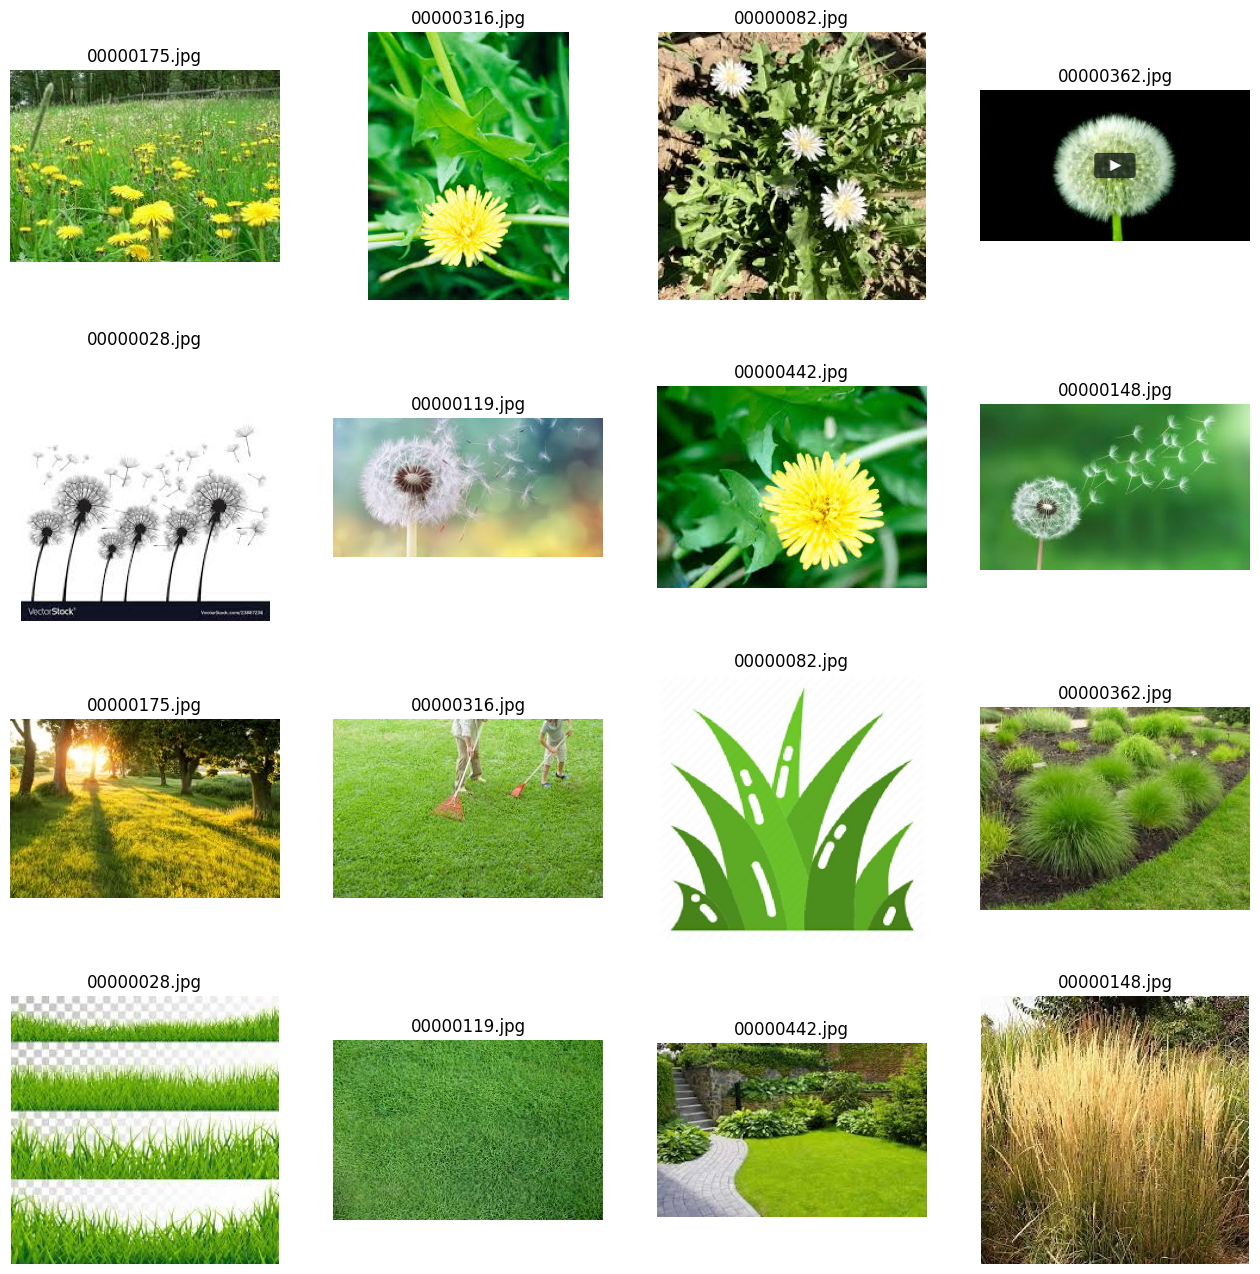

In [ ]:
#We set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_dandelion_pic = [os.path.join(train_dandelion_dir, fname)
                for fname in train_dandelion_names[pic_index-8:pic_index]]
next_grass_pic = [os.path.join(train_grass_dir, fname)
                for fname in train_grass_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_dandelion_pic + next_grass_pic):
  #We set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path) # here read the image from the path
  plt.imshow(img)   # here display the read image
  plt.title(os.path.basename(os.path.split(img_path)[1])) # try to extract the name of class from the image path
plt.show()



#### Data Preprocessing

Now, let's use `keras.preprocessing.image.ImageDataGenerator` class to create our train and validation dataset and normalize our data.

- It's important to normalize our data because data going into neural network to improve its overall performance.
- We will use the `rescale` parameter to scale our image pixel values from [0, 255] to [0,1].

- In each generator, we specify the source directory of our images, the classes, the input image size, the batch size (how many images to process at once), and class mode.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/train/',  # This is the source directory for training images
        classes = ['dandelion', 'grass'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=120,
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/valid/',  # This is the source directory for training images
        classes = ['dandelion', 'grass'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=19,
        # Use binary labels
        class_mode='binary',
        shuffle=False)

Found 999 images belonging to 2 classes.
Found 148 images belonging to 2 classes.


## Building the FC-NN Model from Scratch

Step 1 will be to import tensorflow and other libraries

In [ ]:
import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


**Tips:**

- First, we will add the first layer as Flatten layer that flattens the input image (to get 1D image data), which then feeds into the next layer,
-  Second layer: Dense layer (or fully-connected layer), with 256 hidden units.
- Finally, because our goal is to perform binary classification, our final layer will be a one unit of sigmoid function (activation function)  
#### Why sigmoid?
 so that the output of our network will be a single scalar between 0 and 1, encoding the probability that the current image is of class 1 (class 1 being grass and class 0 being dandelion).

In [ ]:
modelfc = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (200,200,3)), #3 for The Red, blue, green channel
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])

The model.summary() method call prints a summary of the NN

In [ ]:
modelfc.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 120000)            0         
                                                                 
 dense (Dense)               (None, 256)               30720256  
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 30720513 (117.19 MB)
Trainable params: 30720513 (117.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Next, we'll configure the specifications for model training. We will train our model with the `binary_crossentropy` loss. We will use the `Adam` optimizer. [Adam](https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam) is a sensible optimization algorithm because it automates learning-rate tuning for us (alternatively, we could also use [RMSProp](https://wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp) or [Adagrad](https://developers.google.com/machine-learning/glossary/#AdaGrad) for similar results). We will add accuracy to `metrics` so that the model will monitor accuracy during training

In [ ]:
modelfc.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

### Training step (fit) -Fully Connected NN
Let's train for 15 epochs.

Note that steps_per_epoch was set along with batch_size in ImageDataGenerator so that steps_per_epoch * batch_size = total # of images. For example, for training, 8 * 120 = 960, just under our total of 999 images.

Notice that as we train, our validation accuracy never exceeds training accuracy, which is a good thing. Our model won't work better on unseen images than seen images.

In [ ]:

history = modelfc.fit(train_generator,
      steps_per_epoch=8,
      epochs=25,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/25
8/8 [==============================] - 5s 254ms/step - loss: 54.2788 - accuracy: 0.5404 - val_loss: 73.1072 - val_accuracy: 0.3784
Epoch 2/25
8/8 [==============================] - 2s 266ms/step - loss: 43.5251 - accuracy: 0.5028 - val_loss: 2.9526 - val_accuracy: 0.6892
Epoch 3/25
8/8 [==============================] - 2s 263ms/step - loss: 15.5553 - accuracy: 0.5927 - val_loss: 6.3278 - val_accuracy: 0.6419
Epoch 4/25
8/8 [==============================] - 2s 270ms/step - loss: 7.4469 - accuracy: 0.6337 - val_loss: 4.0676 - val_accuracy: 0.6419
Epoch 5/25
8/8 [==============================] - 3s 322ms/step - loss: 5.8547 - accuracy: 0.6655 - val_loss: 8.5061 - val_accuracy: 0.4662
Epoch 6/25
8/8 [==============================] - 2s 266ms/step - loss: 4.4765 - accuracy: 0.6803 - val_loss: 4.1405 - val_accuracy: 0.6419
Epoch 7/25
8/8 [==============================] - 2s 277ms/step - loss: 2.7617 - accuracy: 0.7247 - val_loss: 4.8889 - val_accuracy: 0.5270
Epoch 8/25
8/8 [

### Evaluation of Model: Accuracy, ROC Curve, and AUC

Let's evaluate the accuracy of FC model, and plot the accuracy curve during training :

In [ ]:
modelfc.evaluate(validation_generator)

8/8 [==============================] - 0s 50ms/step - loss: 1.3969 - accuracy: 0.6892


[1.3968807458877563, 0.6891891956329346]

Now, let's plot the accuracy curve of train and valid data, and see the learning trend.

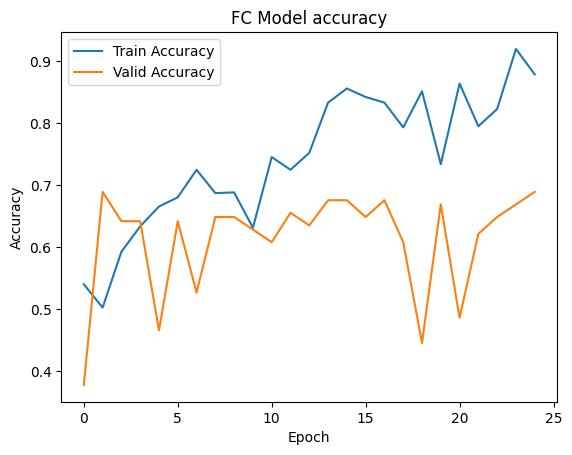

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("FC Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train Accuracy","Valid Accuracy","Train loss","Valid Loss"])

Now, let's calculate our ROC curve and plot it.

First, let's make predictions on our validation set. When using generators to make predictions, we must first turn off shuffle (as we did when we created validation_generator) and reset the generator:

In [ ]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()  #it's necessary, to make prediction start, with the first batch. Because the index is on the end of queue due to fit function
preds = modelfc.predict(validation_generator,verbose=1)

8/8 [==============================] - 0s 52ms/step


To create the ROC curve and AUC, we'll need to compute the false-positive rate and the true-positive rate:

In [ ]:
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)

In [ ]:
roc_auc = auc(fpr, tpr)

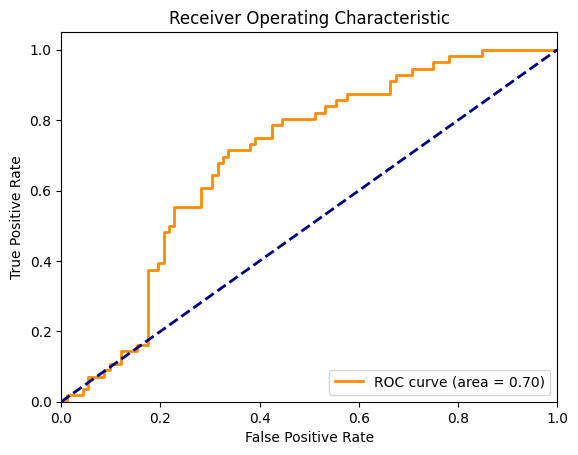

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The ROC curve is a probability curve plotting the true-positive rate (TPR) against the false-positive rate (FPR). In this curve, the diagonal line is the curve for random guessing, e.g. coin flipping, so the ROC curve above shows that our model does better than chance at classifying between dandelions and grass. Not bad!

Similarly, the AUC (area under curve), as shown in the legend above, measures how much our model is capable of distinguishing between our two classes, dandelions and grass. The higher the AUC, the better our model is at classification. It is also used to compare different models, which I will do in future tutorials when I present how to build an image classifier using Convolutional Neural Networks and transfer learning with ResNet!

### Making Predictions on specific Files

Now, let's use the model to make predictions! Upload an image to see if it's a dandelion or grass.

Saving WhatsApp Image 2024-02-16 at 15.02.39.jpeg to WhatsApp Image 2024-02-16 at 15.02.39.jpeg
1/1 [==============================] - 0s 51ms/step
[1.]
WhatsApp Image 2024-02-16 at 15.02.39.jpeg is a grass


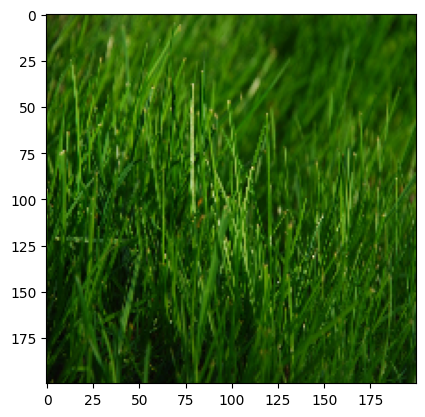

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = modelfc.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]<0.5:
    print(fn + " is a dandelion")
  else:
    print(fn + " is a grass")


## Building the CNN Model from Scratch
**Tips:**

- First, add the first layer as conv2d of 16 filters of 3x3 size, and activation relu
-  Second layer: MaxPooling2D layer
- repeat this block of layers, increasing number of filters (32, 64), following each time by a MaxPooling2D layer
- add a flatten layer to prepare 2D feature maps to be ready for FC layer
- add a Dense layer with 512 units
- Finally, add a Dense layer with one unit




In [ ]:
modelcnn = tf.keras.models.Sequential([
# Note the input shape is the desired size of the image 200x200 with 3 bytes color
# This is the first convolution
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
tf.keras.layers.MaxPooling2D(2, 2),
# The second convolution
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# The third convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# The fourth convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# # The fifth convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# Flatten the results to feed into a DNN
tf.keras.layers.Flatten(),
# 512 neuron hidden layer
tf.keras.layers.Dense(512, activation='relu'),
# Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('dandelions') and 1 for the other ('grass')
tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
modelcnn.compile(loss='binary_crossentropy',
optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
metrics='accuracy')

In [ ]:
history = modelcnn.fit(train_generator,
steps_per_epoch=8,
epochs=15,
verbose=1,
validation_data = validation_generator,
validation_steps=8)

Epoch 1/15
8/8 [==============================] - 11s 508ms/step - loss: 0.6968 - accuracy: 0.5142 - val_loss: 0.6652 - val_accuracy: 0.6757
Epoch 2/15
8/8 [==============================] - 2s 272ms/step - loss: 0.6838 - accuracy: 0.5631 - val_loss: 0.6957 - val_accuracy: 0.4730
Epoch 3/15
8/8 [==============================] - 2s 284ms/step - loss: 0.7987 - accuracy: 0.6135 - val_loss: 0.6482 - val_accuracy: 0.7162
Epoch 4/15
8/8 [==============================] - 2s 280ms/step - loss: 0.6285 - accuracy: 0.6667 - val_loss: 0.5697 - val_accuracy: 0.7162
Epoch 5/15
8/8 [==============================] - 3s 421ms/step - loss: 0.7814 - accuracy: 0.5245 - val_loss: 0.6499 - val_accuracy: 0.6757
Epoch 6/15
8/8 [==============================] - 2s 281ms/step - loss: 0.6511 - accuracy: 0.6451 - val_loss: 0.6405 - val_accuracy: 0.6959
Epoch 7/15
8/8 [==============================] - 2s 285ms/step - loss: 0.5748 - accuracy: 0.7125 - val_loss: 0.5265 - val_accuracy: 0.6959
Epoch 8/15
8/8 [===

### Evaluation of Model: Accuracy, ROC Curve, and AUC





In [ ]:
modelcnn.evaluate(validation_generator)

8/8 [==============================] - 0s 51ms/step - loss: 0.4736 - accuracy: 0.7905


[0.47363099455833435, 0.7905405163764954]

we plot the part of loss curve for train and validation data

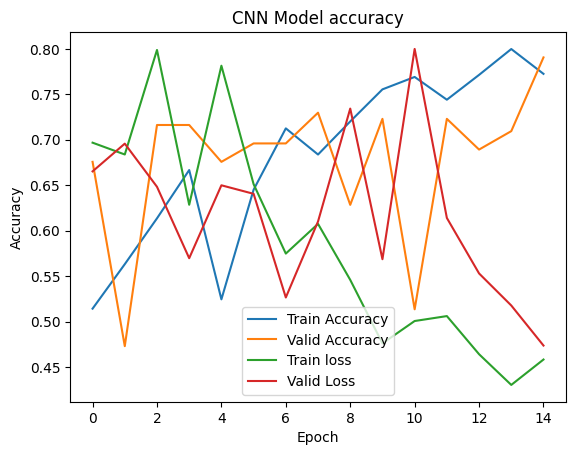

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("CNN Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train Accuracy","Valid Accuracy","Train loss","Valid Loss"])

In [ ]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds2 = modelcnn.predict(validation_generator,
                      verbose=1)



8/8 [==============================] - 0s 52ms/step


In [ ]:
fpr_cnn, tpr_cnn, _ = roc_curve(validation_generator.classes, preds2)

In [ ]:
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

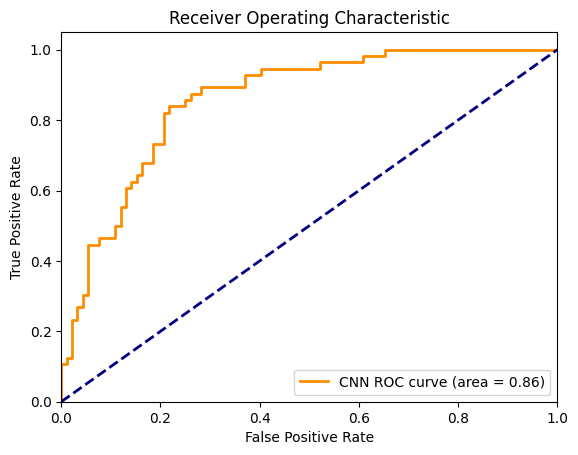

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr_cnn, tpr_cnn, color='darkorange',
         lw=lw, label='CNN ROC curve (area = %0.2f)' % roc_auc_cnn)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Making Predictions on specific Files

Now, let's use the model to make predictions! Upload an image to see if it's a dandelion or grass.

Saving WhatsApp Image 2024-02-16 at 15.02.39.jpeg to WhatsApp Image 2024-02-16 at 15.02.39 (1).jpeg
1/1 [==============================] - 0s 359ms/step
[1.]
WhatsApp Image 2024-02-16 at 15.02.39 (1).jpeg is a grass


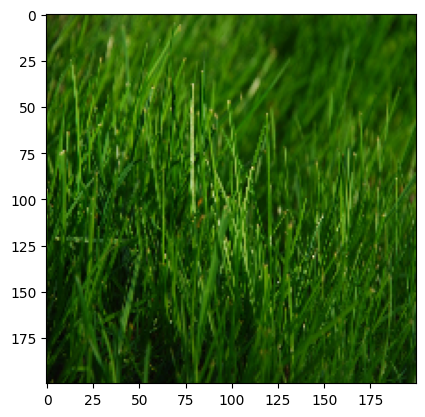

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = modelcnn.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]<0.5:
    print(fn + " is a dandelion")
  else:
    print(fn + " is a grass")


### **Compare two Models (FC-NN vs CNN) **


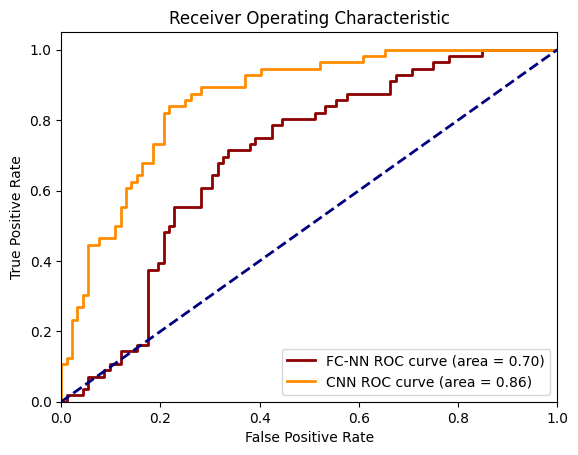

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkred',
         lw=lw, label='FC-NN ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr_cnn, tpr_cnn, color='darkorange',
         lw=lw, label='CNN ROC curve (area = %0.2f)' % roc_auc_cnn)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()




## **Transfer Learning**

**MobileNet-v2** is a convolutional neural network that is 53 deep layers . We can load a pretrained version of the network trained on more than a million images from the ImageNet database. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals.

As a result, the network has learned rich feature representations for a wide range of images. The network has an image input size of 224-by-224. For more pretrained networks, for Image Classification, those are some pre-trained - Models
- VGG-16
- ResNet50
- Inceptionv3
- EfficientNet



In [ ]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp


In [ ]:
model_tl = Sequential()
model_tl.add(MobileNetV2(include_top = False, weights="imagenet", input_shape=(224, 224, 3)))
model_tl.add(tf.keras.layers.GlobalAveragePooling2D())
model_tl.add(Dense(1, activation = 'sigmoid'))
model_tl.layers[0].trainable = False

9406464/9406464 [==============================] - 1s 0us/step


**Note** that when loading the basic model, the “**include_top**” argument can be set (and for our purpose must be set) to False, in this case the fully-connected output layers of the model used to make predictions is not loaded, allowing a new output layer to be added and trained.

Additionally, when the “**include_top**” argument is False, the “input_tensor” argument can be changed to specify a new input shape, as in our case 200, where the originl model has 224, that allowing the expected fixed-sized input of the model to be changed

In [ ]:
model_tl.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_4 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2259265 (8.62 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import RMSprop

model_tl.compile(optimizer=RMSprop(lr=0.01), loss = 'binary_crossentropy', metrics = 'accuracy')

In [ ]:
history = model_tl.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 9s 656ms/step - loss: 0.5661 - accuracy: 0.7065 - val_loss: 0.5956 - val_accuracy: 0.6689
Epoch 2/15
8/8 [==============================] - 3s 326ms/step - loss: 0.3604 - accuracy: 0.8578 - val_loss: 0.4654 - val_accuracy: 0.7365
Epoch 3/15
8/8 [==============================] - 2s 282ms/step - loss: 0.2679 - accuracy: 0.9192 - val_loss: 0.3683 - val_accuracy: 0.8514
Epoch 4/15
8/8 [==============================] - 2s 285ms/step - loss: 0.2262 - accuracy: 0.9261 - val_loss: 0.3367 - val_accuracy: 0.8581
Epoch 5/15
8/8 [==============================] - 2s 295ms/step - loss: 0.2064 - accuracy: 0.9312 - val_loss: 0.3446 - val_accuracy: 0.8649
Epoch 6/15
8/8 [==============================] - 3s 393ms/step - loss: 0.1805 - accuracy: 0.9408 - val_loss: 0.3205 - val_accuracy: 0.8784
Epoch 7/15
8/8 [==============================] - 2s 293ms/step - loss: 0.1618 - accuracy: 0.9479 - val_loss: 0.2804 - val_accuracy: 0.8919
Epoch 8/15
8/8 [====

### Evaluation of Model: Accuracy, ROC Curve, and AUC

In [ ]:
model_tl.evaluate(validation_generator)

8/8 [==============================] - 1s 69ms/step - loss: 0.2275 - accuracy: 0.8986


[0.22748632729053497, 0.8986486196517944]

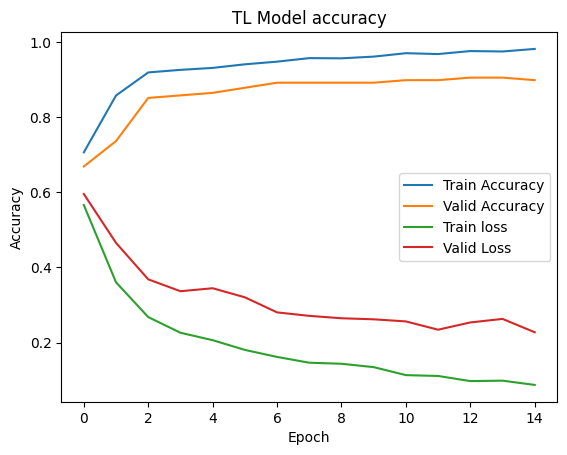

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("TL Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train Accuracy","Valid Accuracy","Train loss","Valid Loss"])

In [ ]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds3 = model_tl.predict(validation_generator,
                      verbose=1)


8/8 [==============================] - 1s 58ms/step


In [ ]:
model_tl.evaluate(validation_generator,
                      verbose=1)


8/8 [==============================] - 1s 60ms/step - loss: 0.2275 - accuracy: 0.8986


[0.22748632729053497, 0.8986486196517944]

In [ ]:
fpr_tl, tpr_tl, _ = roc_curve(validation_generator.classes, preds3)

In [ ]:
roc_auc_tl = auc(fpr_tl, tpr_tl)

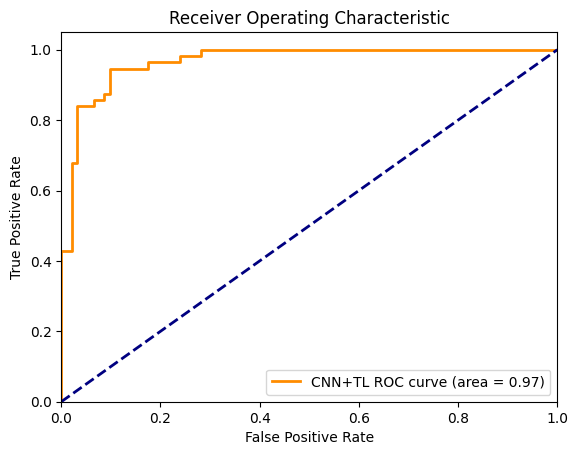

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr_tl, tpr_tl, color='darkorange',
         lw=lw, label='CNN+TL ROC curve (area = %0.2f)' % roc_auc_tl)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

We will transfer learning from ResNet50, MobileNetV2 networks to perform the same task of classification

- compare between the three architectures, showing the performances, and the complexity
- Which model would we choose for your system ?

In [ ]:
model_tl2 = Sequential()
model_tl2.add(ResNet50V2(include_top = False, weights="imagenet", input_shape=(224, 224, 3)))
model_tl2.add(tf.keras.layers.GlobalAveragePooling2D())
model_tl2.add(Dense(1, activation = 'sigmoid'))
model_tl2.layers[0].trainable = False

model_tl2.summary()

94668760/94668760 [==============================] - 3s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d_2  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_6 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23566849 (89.90 MB)
Trainable params: 2049 (8.00 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


### Training 2nd Model of transfer learning ResNet50

In [ ]:
from tensorflow.keras.optimizers import RMSprop


model_tl2.compile(optimizer=RMSprop(lr=0.01), loss = 'binary_crossentropy', metrics = 'accuracy')

history = model_tl2.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 20s 1s/step - loss: 0.5388 - accuracy: 0.7270 - val_loss: 0.4029 - val_accuracy: 0.8311
Epoch 2/15
8/8 [==============================] - 3s 380ms/step - loss: 0.3188 - accuracy: 0.9113 - val_loss: 0.3145 - val_accuracy: 0.8986
Epoch 3/15
8/8 [==============================] - 3s 330ms/step - loss: 0.2468 - accuracy: 0.9317 - val_loss: 0.2646 - val_accuracy: 0.9189
Epoch 4/15
8/8 [==============================] - 3s 331ms/step - loss: 0.2080 - accuracy: 0.9374 - val_loss: 0.2396 - val_accuracy: 0.9392
Epoch 5/15
8/8 [==============================] - 3s 343ms/step - loss: 0.1758 - accuracy: 0.9443 - val_loss: 0.2101 - val_accuracy: 0.9459
Epoch 6/15
8/8 [==============================] - 3s 334ms/step - loss: 0.1575 - accuracy: 0.9488 - val_loss: 0.1847 - val_accuracy: 0.9527
Epoch 7/15
8/8 [==============================] - 3s 332ms/step - loss: 0.1376 - accuracy: 0.9556 - val_loss: 0.1730 - val_accuracy: 0.9527
Epoch 8/15
8/8 [======

In [ ]:
model_tl2.evaluate(validation_generator)

8/8 [==============================] - 1s 73ms/step - loss: 0.1371 - accuracy: 0.9527


[0.13710331916809082, 0.9527027010917664]

In [ ]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds4 = model_tl2.predict(validation_generator,
                      verbose=1)

8/8 [==============================] - 1s 77ms/step


**Compare the both TL**

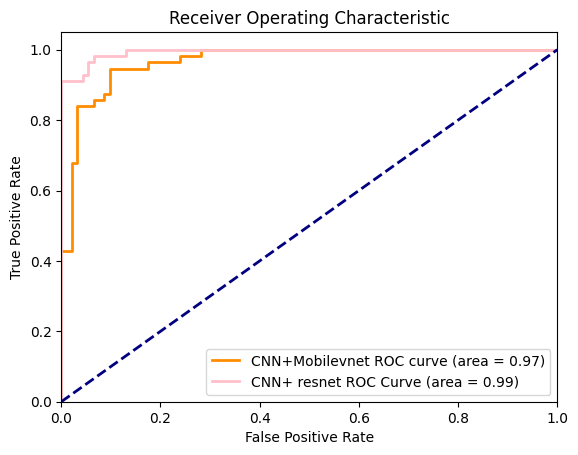

In [ ]:
fpr_tl1, tpr_tl1, _ = roc_curve(validation_generator.classes, preds4)
roc_auc_tl1 = auc(fpr_tl1, tpr_tl1)

plt.figure()
lw = 2
plt.plot(fpr_tl, tpr_tl, color='darkorange',
         lw=lw, label='CNN+Mobilevnet ROC curve (area = %0.2f)' % roc_auc_tl)
plt.plot(fpr_tl1, tpr_tl1, color='pink', lw=lw, label= 'CNN+ resnet ROC Curve (area = %0.2f)' % roc_auc_tl1 )
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Interpretation**

The winner is Resnet. Like you can see on the plot, the curve for the resnet is higher than the one for Mobilevnet. So, logically, the AUC score for the resnet is higher.

**Compare the performances of three Models**

- Now, we have to compare between three models: FC-NN, CNN, TL(winning one)
  

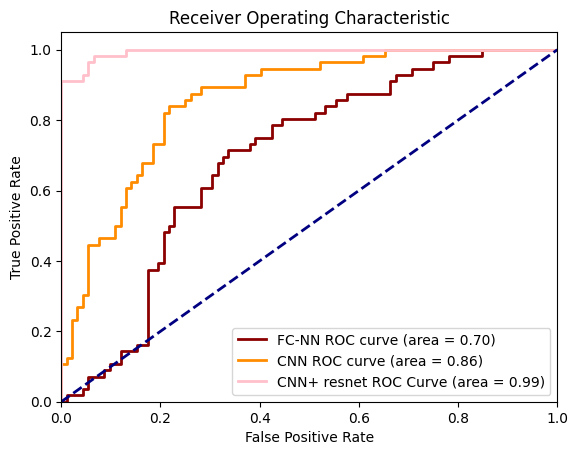

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkred',
         lw=lw, label='FC-NN ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr_cnn, tpr_cnn, color='darkorange',
         lw=lw, label='CNN ROC curve (area = %0.2f)' % roc_auc_cnn)
plt.plot(fpr_tl1, tpr_tl1, color='pink', lw=lw, label= 'CNN+ resnet ROC Curve (area = %0.2f)' % roc_auc_tl1 )
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**INTERPRETATION**

The final winner is the Fine tuned models (Resnet). We have choose to classify our models depending on the ROC-AUC score. The most efficient models with this methods is the one with the highest area (AUC). This area can be appreciate visually on the plot; the most suitable point for every model (the point were the models have the highest AUC score)) is located at the top left of the graph, and the curve which tends the most to this area is the most suitable one (the one with the highest area), for our case, this graph is the one from Resnet models. We also notice that the CNN have a better score than the FC-NN

## Clean Up
Run the following cell to terminate the kernel and free memory resources:

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)